**AUTHOR: REGOMODITSWE MASENYA**<br>
**DATASET SOURCE**:https://www.kaggle.com/datasets/athirags/heart-disease-dataset<br>
**GITHUB LINK**: <br><br>
**DATE: 14 APRIL 2023**

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
import plotly.express as px
from scipy.stats import kurtosis

#Reading a CSV file as a DataFrame
heart_disease_df = pd.read_csv('heart_disease.csv')
filename = ('heart_disease')

heart_disease_df = pd.read_csv('heart_disease.csv')
heart_disease_df.head(10)

,age,BP,cholestrol,heart disease
0,70,130,322,1
1,67,115,564,0
2,57,124,261,1
3,64,128,263,0
4,74,120,269,0
5,65,120,177,0
6,56,130,256,1
7,59,110,239,1
8,60,140,293,1
9,63,150,407,1


# CHECKING FOR MISSING OR NON-NUMERIC DATA

In [2]:
#Displaying summary information about the DataFrame
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   BP             270 non-null    int64
 2   cholestrol     270 non-null    int64
 3   heart disease  270 non-null    int64
dtypes: int64(4)
memory usage: 8.6 KB


In [3]:
#Checking for missing values (null values) in the 'age', 'BP', 'Cholestrol', and 'heart disease'
print ('Series age data (isna) issue check: ', heart_disease_df['age'].isna().sum(), ' isues found.')
print ('Series BP data (isna) issue check: ',heart_disease_df['BP'].isna().sum(), ' isues found.')
print ('Series cholestrol data (isna) issue check: ', heart_disease_df['cholestrol'].isna().sum(), ' isues found.')
print ('Series heart disease data (isna) issue check: ', heart_disease_df['heart disease'].isna().sum(), ' isues found.')


Series age data (isna) issue check:  0  isues found.
Series BP data (isna) issue check:  0  isues found.
Series cholestrol data (isna) issue check:  0  isues found.
Series heart disease data (isna) issue check:  0  isues found.


# STATISTICS

In [4]:
print ('Mean:\n', heart_disease_df .mean(), '\n')

Mean:
 age               54.433333
BP               131.344444
cholestrol       249.659259
heart disease      0.444444
dtype: float64 



In [5]:
print ('Mode:\n', heart_disease_df .mode(), '\n')

Mode:
    age   BP  cholestrol  heart disease
0   54  120         234              0 



In [6]:
print ('Min:\n', heart_disease_df .min(), '\n')

Min:
 age               29
BP                94
cholestrol       126
heart disease      0
dtype: int64 



In [7]:
print ('Max:\n', heart_disease_df .max(), '\n')

Max:
 age               77
BP               200
cholestrol       564
heart disease      1
dtype: int64 



In [8]:
print ('Median:\n', heart_disease_df .median(), '\n')

Median:
 age               55.0
BP               130.0
cholestrol       245.0
heart disease      0.0
dtype: float64 



In [9]:
print ('count:\n', heart_disease_df .count(), '\n')

count:
 age              270
BP               270
cholestrol       270
heart disease    270
dtype: int64 



In [10]:
print ('sum:\n', heart_disease_df .sum(), '\n')

sum:
 age              14697
BP               35463
cholestrol       67408
heart disease      120
dtype: int64 



In [11]:
range_of_age = heart_disease_df['age'].max() - heart_disease_df['age'].min()
print('Range', range_of_age)

Range 48


In [15]:
range_of_BP = heart_disease_df['BP'].max() - heart_disease_df['BP'].min()
print('Range', range_of_BP)

Range 106


In [18]:
range_of_cholestrol = heart_disease_df['cholestrol'].max() - heart_disease_df['cholestrol'].min()
print('Range', range_of_cholestrol)

Range 438


In [20]:
range_of_heart_disease = heart_disease_df['heart disease'].max() - heart_disease_df['heart disease'].min()
print('Range', range_of_heart_disease)

Range 1


In [21]:
print ('Geometric mean \n', stats.gmean(heart_disease_df.loc[:,'age']))

Geometric mean 
 53.636868443160644


In [22]:
print ('Geometric mean \n', stats.gmean(heart_disease_df.loc[:,'BP']))

Geometric mean 
 130.181422119153


In [23]:
print ('Geometric mean \n', stats.gmean(heart_disease_df.loc[:,'cholestrol']))

Geometric mean 
 244.67426123607336


In [24]:
print ('Geometric mean \n', stats.gmean(heart_disease_df.loc[:,'heart disease']))

Geometric mean 
 0.0


In [30]:
print('variance\n', np.var(heart_disease_df.loc[:,['age', 'BP', 'cholestrol', 'heart disease']]))


variance
 age                82.667778
BP                317.855432
cholestrol       2661.572785
heart disease       0.246914
dtype: float64


In [31]:
print('standard deviation\n', np.std(heart_disease_df.loc[:,['age', 'BP', 'cholestrol', 'heart disease']]))


standard deviation
 age               9.092182
BP               17.828501
cholestrol       51.590433
heart disease     0.496904
dtype: float64


In [28]:
#Calculating the weights based on the number of samples in each age group
weights = heart_disease_df.groupby('age').size()
#Calculating the weighted mean of the age column
weighted_mean = (heart_disease_df['age'] * weights).sum() / weights.sum()
print(f"The weighted mean of age is {weighted_mean:.2f}")

The weighted mean of age is 54.77


# CALCULATING FIRST, SECOND AND THIRD QUARTILES


In [50]:
age_bp_chol_hd = pd.read_csv('heart_disease.csv')
q1_age = np.percentile(age_bp_chol_hd ['age'], 25)
q1_BP = np.percentile(age_bp_chol_hd ['BP'], 25)
q1_cholestrol = np.percentile(age_bp_chol_hd ['cholestrol'], 25)
q1_hd = np.percentile(age_bp_chol_hd ['heart disease'], 25)
print ('First quartile of age:', q1_age)
print ('First quartile of BP:', q1_BP)
print ('First quartile of cholestrol:', q1_cholestrol)
print ('First quartile of heart disease:', q1_hd)

First quartile of age: 48.0
First quartile of BP: 120.0
First quartile of cholestrol: 213.0
First quartile of heart disease: 0.0


In [51]:
age_bp_chol_hd = pd.read_csv('heart_disease.csv')
q2_age = np.percentile(age_bp_chol_hd ['age'], 50)
q2_BP = np.percentile(age_bp_chol_hd ['BP'], 50)
q2_cholestrol = np.percentile(age_bp_chol_hd ['cholestrol'], 50)
q2_hd = np.percentile(age_bp_chol_hd ['heart disease'], 50)
print ('Second quartile of age:', q2_age)
print ('Second quartile of BP:', q2_BP)
print ('Second quartile of cholestrol:', q2_cholestrol)
print ('Second quartile of heart disease:', q2_hd)

Second quartile of age: 55.0
Second quartile of BP: 130.0
Second quartile of cholestrol: 245.0
Second quartile of heart disease: 0.0


In [5]:
age_bp_chol_hd = pd.read_csv('heart_disease.csv')
q3_age = np.percentile(age_bp_chol_hd ['age'], 75)
q3_BP = np.percentile(age_bp_chol_hd ['BP'], 75)
q3_cholestrol = np.percentile(age_bp_chol_hd ['cholestrol'], 75)
q3_hd = np.percentile(age_bp_chol_hd ['heart disease'], 75)
print ('Third quartile of age:', q3_age)
print ('Third quartile of BP:', q3_BP)
print ('Third quartile of cholestrol:', q3_cholestrol)
print ('Third quartile of heart disease:', q3_hd)

Third quartile of age: 61.0
Third quartile of BP: 140.0
Third quartile of cholestrol: 280.0
Third quartile of heart disease: 1.0


## SUMMARY OF DESCRIPTIVE STATISTICS 

In [3]:
heart_disease_df.describe()

,age,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,0.444444
std,9.109067,17.861608,51.686237,0.497827
min,29.000000,94.000000,126.000000,0.000000
25%,48.000000,120.000000,213.000000,0.000000
50%,55.000000,130.000000,245.000000,0.000000
75%,61.000000,140.000000,280.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000


# STATISTICS NOT COVERED IN CLASS

In [41]:
print('harmonic mean\n', stats.hmean(heart_disease_df.loc[:,'age',]))

harmonic mean
 52.80067537744953


In [42]:
print('harmonic mean\n', stats.hmean(heart_disease_df.loc[:,'BP',]))

harmonic mean
 129.05747317879326


In [43]:
print('harmonic mean\n', stats.hmean(heart_disease_df.loc[:,'cholestrol',]))

harmonic mean
 239.84873398445674


In [44]:
print('harmonic mean\n', stats.hmean(heart_disease_df.loc[:,'heart disease',]))

harmonic mean
 0.0


In [46]:
#Using NumPy function apply_along_axis to calculate the z-scores for 'age', 'BP', 'cholestrol', 'heart disease'
z_scores = np.apply_along_axis(lambda x: (x - np.mean(x)) / np.std(x), 0, heart_disease_df)
print(z_scores)

[[ 1.71209356 -0.07540984  1.40221232  1.11803399]
 [ 1.38213977 -0.91675934  6.0930045  -0.89442719]
 [ 0.2822938  -0.41194964  0.21982255  1.11803399]
 ...
 [ 0.1723092   0.48548982  0.85947603 -0.89442719]
 [ 0.2822938   0.48548982 -1.11763472 -0.89442719]
 [ 1.38213977  1.60728915  0.70440852  1.11803399]]


In [47]:
print('Skew\n', stats.skew(heart_disease_df.loc[:,['age', 'BP', 'cholestrol', 'heart disease']]))

Skew
 [-0.16270485  0.71859725  1.17713449  0.2236068 ]


In [18]:
#Definining numerical columns
numerical_columns = ['age', 'BP','cholestrol', 'heart disease']
data = heart_disease_df[numerical_columns].values

#Calculating kurtosis of each column using kurtosis() function from scipy.stats
k = kurtosis(data)
print ('Kurtosis:', k)

Kurtosis: [-0.55691862  0.88395053  4.78326838 -1.95      ]


In [20]:
#checking for unique values 
heart_disease_df.nunique()

age               41
BP                47
cholestrol       144
heart disease      2
dtype: int64

# CALCULATING PEARSON CORRELLATION COEFFICIENT

In [54]:
#Pearson correlation coefficient between 'age' and 'BP'
corr_coef, p_value = pearsonr(heart_disease_df['age'], heart_disease_df['BP'])
print('Pearson correlation coefficient:', corr_coef)

Pearson correlation coefficient: 0.27305279703407515


In [55]:
#Pearson correlation coefficient between 'age' and 'cholestrol'
corr_coef, p_value = pearsonr(heart_disease_df['age'], heart_disease_df['cholestrol'])
print('Pearson correlation coefficient:', corr_coef)

Pearson correlation coefficient: 0.22005630764974438


In [5]:
#Pearson correlation coefficient between 'age' and 'heart disease'
corr_coef, p_value = pearsonr(heart_disease_df['age'], heart_disease_df['heart disease'])
print('Pearson correlation coefficient:', corr_coef)

Pearson correlation coefficient: 0.2123221874434284


# HISTOGRAM

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'BP'}>],
       [<Axes: title={'center': 'cholestrol'}>,
        <Axes: title={'center': 'heart disease'}>]], dtype=object)

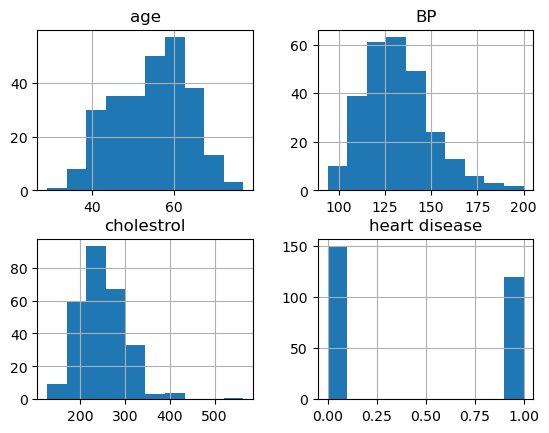

In [57]:
#Visualizing the distribution of numerical values for 'age', 'BP', 'cholestrol' and 'heart disease'
heart_disease_df.hist()

# PAIR PLOT OF AGE, BP, CHOLESTROL AND HEART DISEASE

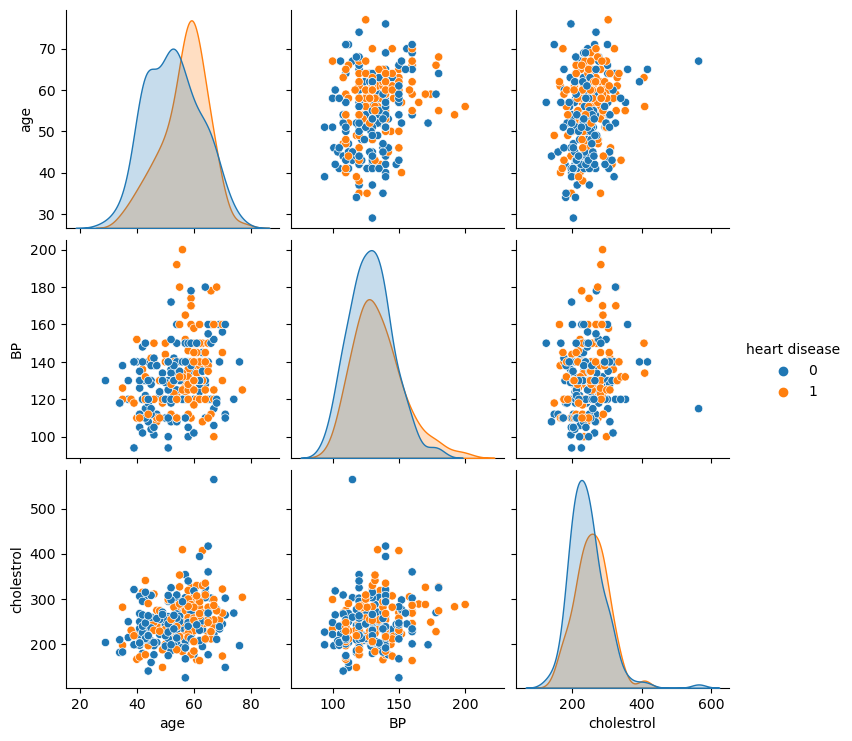

In [58]:
sns.pairplot(heart_disease_df, hue= 'heart disease')
plt.show()

# CORRELATION PLOT

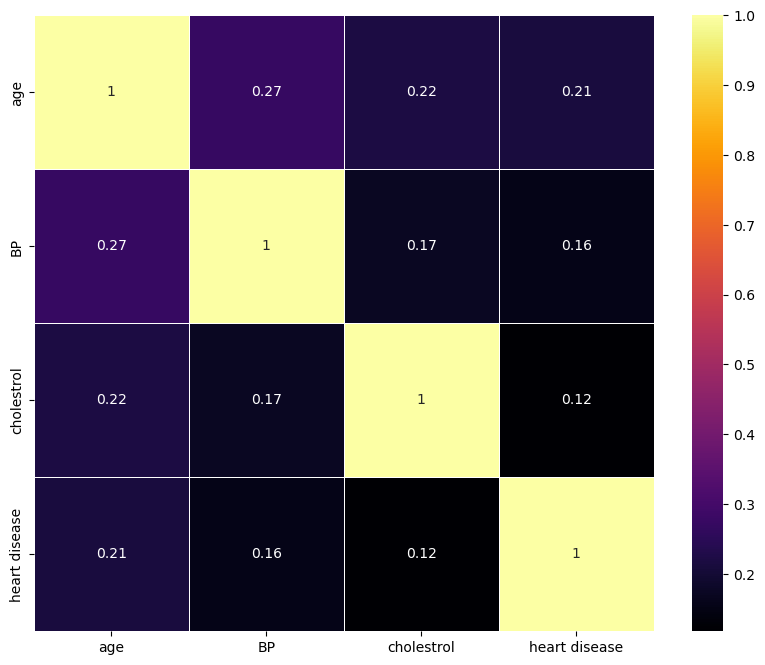

In [18]:
# Calculating the correlation matrix
correlation_matrix = heart_disease_df.corr()

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='inferno', annot=True, linewidths=.5)
plt.show()




# SCATTER PLOT TO SHOW THE RELATIONSHIP BETWEEN AGE, BP AND HEART DISEASE

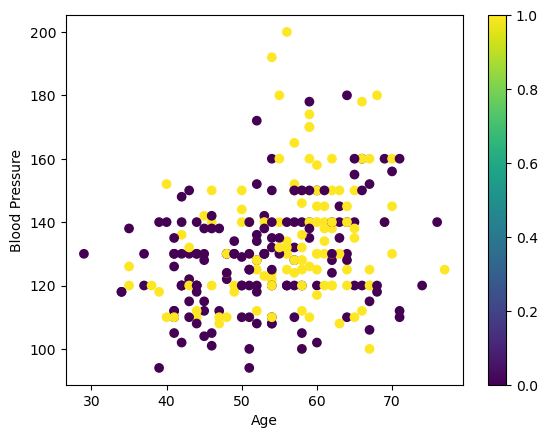

In [64]:
#Generating a scatter plot to show the relationship between age, BP, and heart disease
plt.scatter(x=heart_disease_df['age'], y = heart_disease_df['BP'], c = heart_disease_df['heart disease'])
#Setting x and y parameters
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
#Adding color to the plot
plt.colorbar()
#Displaying the plot
plt.show()

# SCATTER PLOT TO SHOW THE RELATIONSHIP BETWEEN AGE, CHOLESTROL AND HEART DISEASE

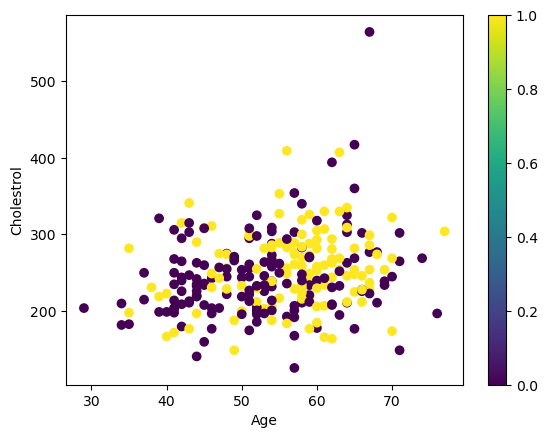

In [13]:
#Generating a scatter plot to show the relationship between age, cholestrol, and heart disease
plt.scatter(x=heart_disease_df['age'], y = heart_disease_df['cholestrol'], c = heart_disease_df['heart disease'])
#Setting x and y parameters
plt.xlabel('Age')
plt.ylabel('Cholestrol')
#Adding color to the plot
plt.colorbar()
#Displaying the plot
plt.show()

# BOX PLOT FOR AGE,BP,CHOLESTROL AND HEART DISEASE

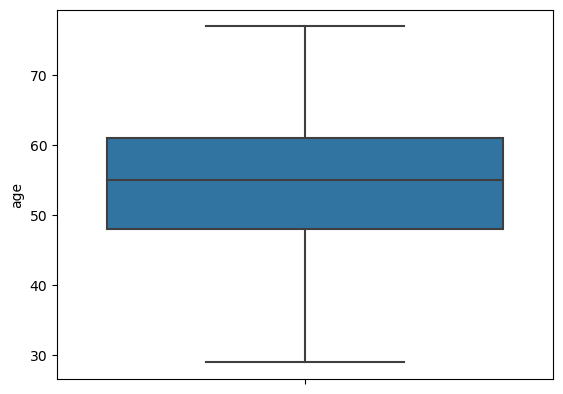

In [67]:
#Creating a boxplot for age using Seaborns boxplot function
sns.boxplot(y = heart_disease_df ['age'])
plt.show()

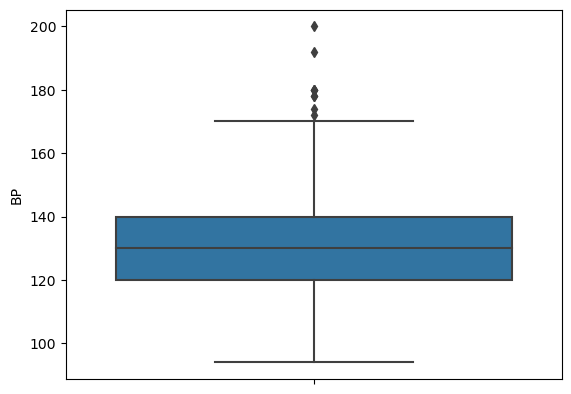

In [68]:
#Creating a boxplot for BP using Seaborns boxplot function
sns.boxplot(y = heart_disease_df ['BP'])
plt.show()

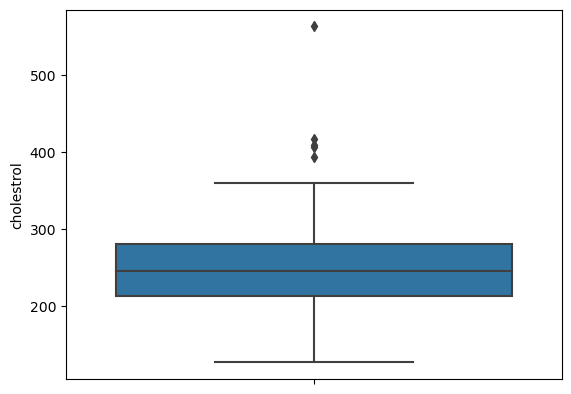

In [69]:
#Creating a boxplot for cholestrol using Seaborns boxplot function
sns.boxplot(y = heart_disease_df ['cholestrol'])
plt.show()

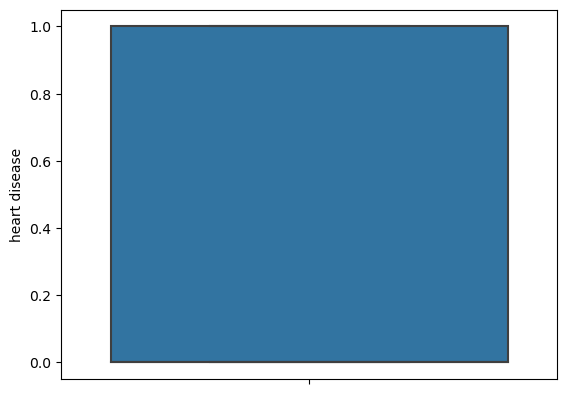

In [70]:
#Creating a boxplot for heart disease using Seaborns boxplot function
sns.boxplot(y = heart_disease_df ['heart disease'])
plt.show()

# REGRESSION PLOT

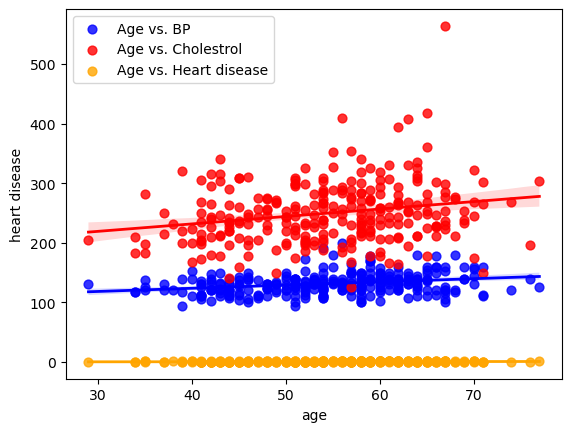

In [3]:
#Regression plot using the sns.regplot() function
sns.regplot(x='age', y='BP', data=heart_disease_df, color='blue', marker='o',
            scatter_kws={'s': 40}, line_kws={'linewidth': 2}, label='Age vs. BP')
sns.regplot(x='age', y='cholestrol', data=heart_disease_df, color='red', marker='o',
            scatter_kws={'s': 40}, line_kws={'linewidth': 2}, label='Age vs. Cholestrol')
sns.regplot(x='age', y='heart disease', data=heart_disease_df, color='orange', marker='o',
            scatter_kws={'s': 40}, line_kws={'linewidth': 2}, label='Age vs. Heart disease')
#adding legend
plt.legend()
#show plot
plt.show()

# FIVE NUMBER SUMMARY

In [45]:
#Calculating five number summary
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)
iqr = q3 - q1
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)

print("Minimum: ", np.min(data))
print("Q1: ", q1)
print("Median: ", q2)
print("Q3: ", q3)
print("Maximum: ", np.max(data))
print("IQR: ", iqr)

#Lower and upper fence to determine outliers
print("Lower fence: ", lower_fence)
print("Upper fence: ", upper_fence)


Minimum:  0.0
Q1:  22.0
Median:  85.5
Q3:  170.5
Maximum:  564.0
IQR:  148.5
Lower fence:  -200.75
Upper fence:  393.25


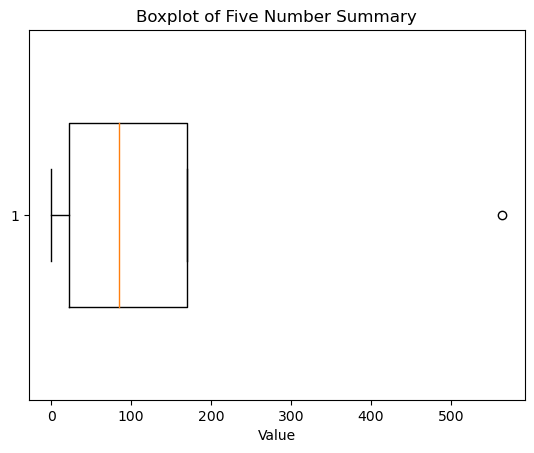

In [44]:
#Data needed for a boxplot
data = [0, 22.0, 85.5, 170.5, 564]

#Creating the boxplot
fig, ax = plt.subplots()
ax.boxplot(data, vert=False, widths=0.5)

#Setting the labels
ax.set_title('Boxplot of Five Number Summary')
ax.set_xlabel('Value')

# Displaying the plot
plt.show()


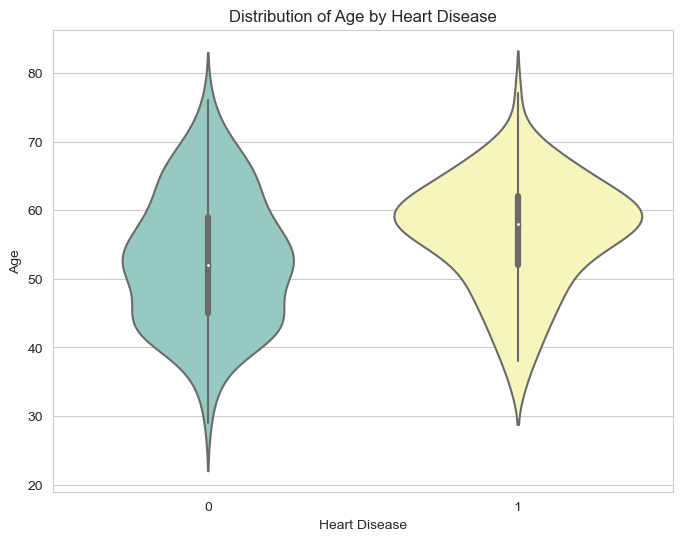

In [5]:
#Creating a violon plot showing the distribution of ages for people with and without heart disease.
sns.set_style("whitegrid")
sns.set_palette("Set3")
plt.figure(figsize=(8, 6))
sns.violinplot(x="heart disease", y="age", data=heart_disease_df)
plt.xlabel("Heart Disease")
plt.ylabel("Age")
plt.title("Distribution of Age by Heart Disease")
plt.show()



# DATA CONCLUSIONS
The age, BP, and cholesterol distributions appear to be approximately normal.<br> Cholesterol distribution has a slight positive skew<br>The heart disease variable is a binary variable, so it follows a binomial distribution.<br>Half of the individuals in the dataset does not have heart disease<br>564 is an outlier because it is more than 1.5 times the interquartile range (IQR) which is above the upper quartile (Q3) of the dataset.

# REFLECTIONS
Reflecting on the differences between completing assignment 3 using Python compared to completing assignment 1 using Excel, I have noticed that Python allows for more customization and flexibility in data analysis, whereas Excel has more user-friendly features for data visualization. I would choose to use either Python or Excel depending on the needs of the assignment. For example, if I needed to create complex statistical models or manipulate large datasets, I would use Python, while for simpler data analysis or creating visualizations, I would use Excel.

If I were to do this assignment over again, I would spend more time exploring different types of plots and visualizations in Python to better understand which ones would be most effective in conveying the information from the dataset. Additionally, I would spend more time practicing basic statistical concepts, such as the five number summary and IQR, to better understand their significance and application in data analysis.

Overall, while I feel comfortable with basic programming concepts and statistical analysis, there are still gaps in my knowledge that I need to work on. For example, I would like to learn more advanced statistical modeling techniques and improve my understanding of probability theory. Additionally, I would like to become more proficient in using Python for data analysis and visualization.